<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/assignment3/Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CRISP-DM: Data Acquistion and Understanding

##Objective:
To gather, explore, and understand the data available for developing the house price prediction model.



## Collect Initial Data

We will collect the dataset from kaggle.

In [23]:
# prompt: get loans.csv to panda data set

import pandas as pd
loans = pd.read_csv('loans_train.csv')


loans.drop('Loan_ID', axis=1, inplace=True)


loans.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Describe DAta
Also, we will see the info as well

In [24]:
loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


It looks like the data has missing information. We will clean tha later.
Right now, we will explore data little bit more deeply




## Explore Data
It appears we have acquired data pertaining to previous borrowers. Utilizing this information, we intend to conduct predictive analyses. However, prior to delving into this, it is imperative that we undertake a thorough cleaning of the dataset.

In [25]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let's find out loan status

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
loans.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

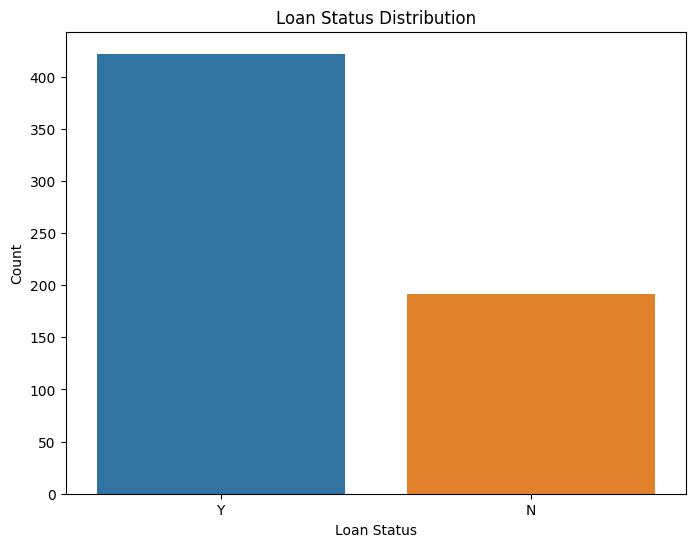

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=loans)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

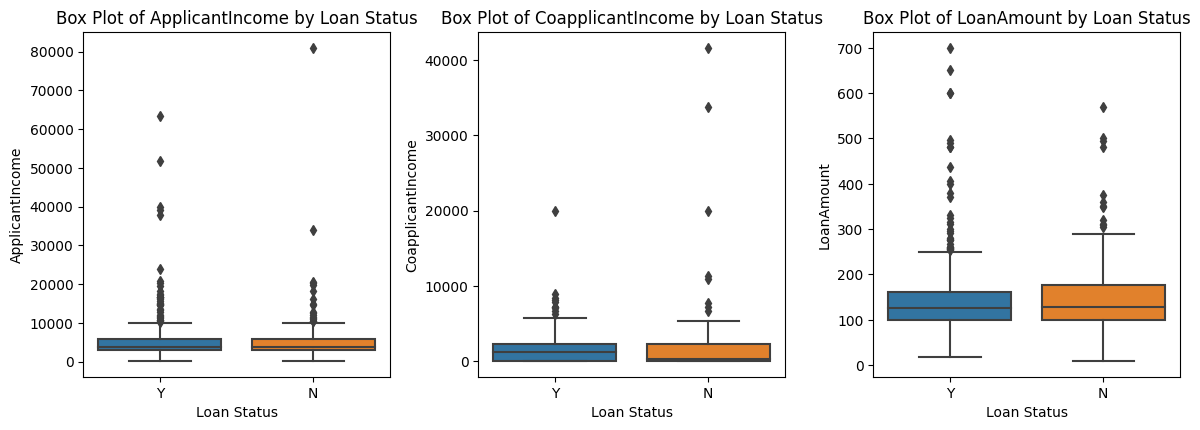

In [34]:
num_cols =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Loan_Status', y=col, data=loans)
    plt.title(f'Box Plot of {col} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Usually low-income takes more chance to get loans with few loans

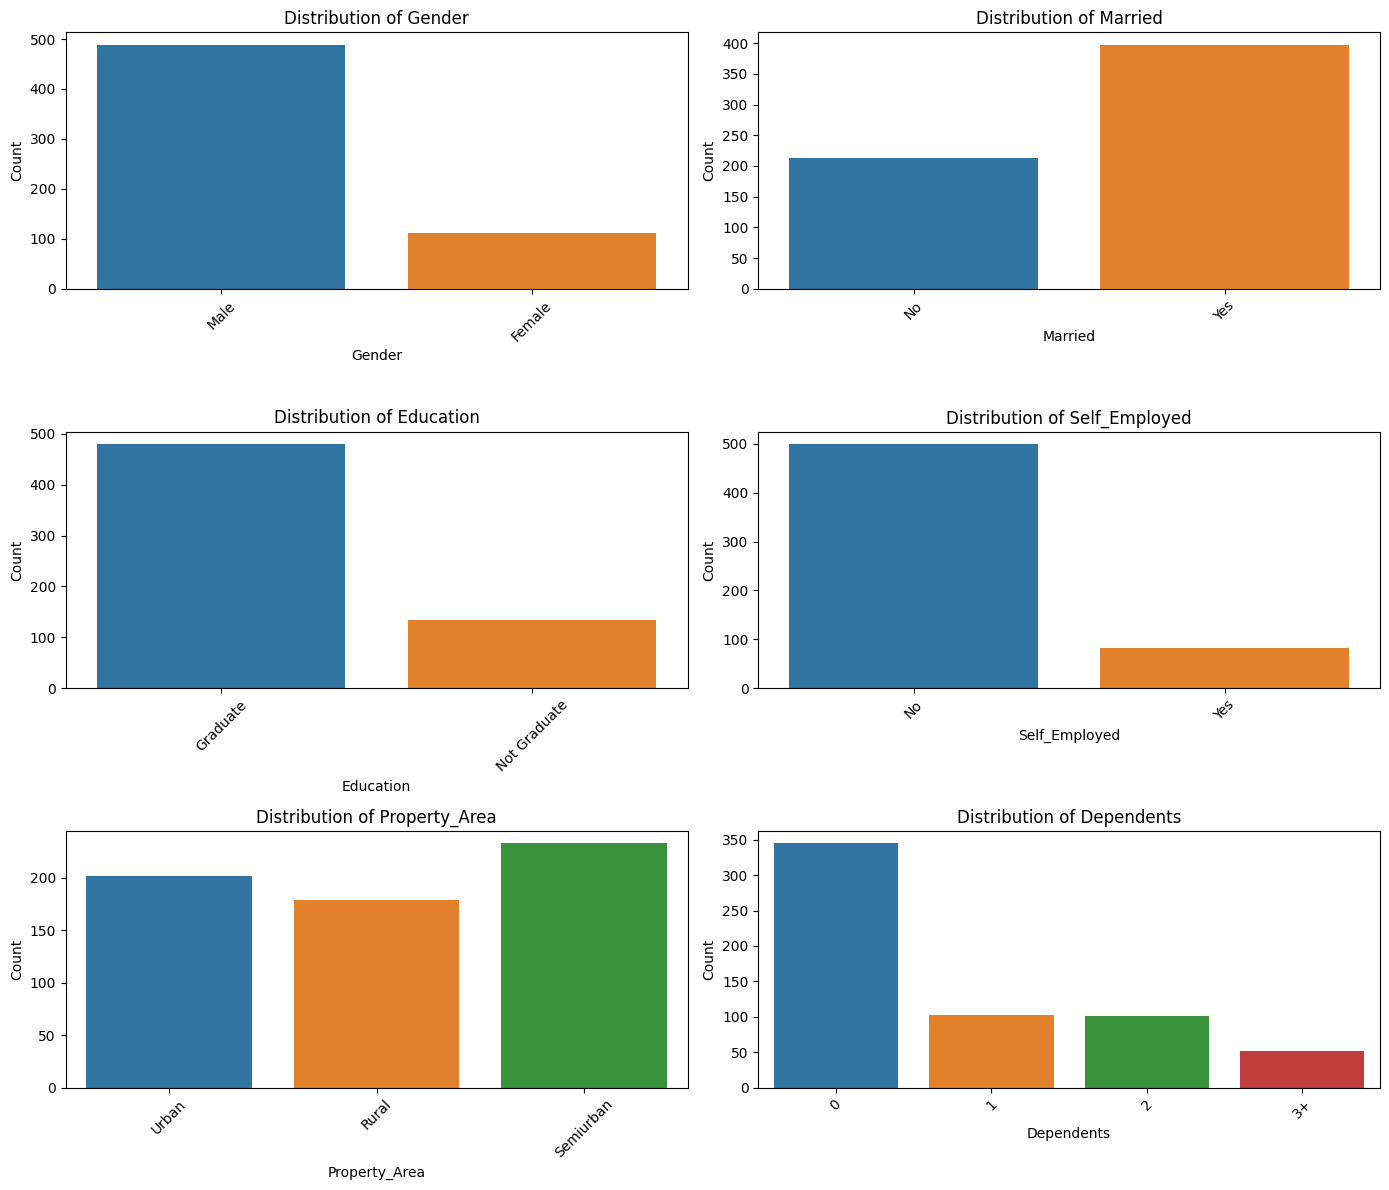

In [32]:
plt.figure(figsize=(14, 12))
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=loans)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that if you wnat to get loan:
it's better to gradaute and doesn't have any depedent